In [1]:
# 
import os

os.chdir("../")
os.getcwd()

'c:\\Users\\HP\\Desktop\\flight-comptetion\\NNights-team'

-- Enrich start ------------- 
add_day_of_year  ...
add_distance_to_holidays  ...
add_distance_to_next_holiday  ...
add_distance_to_previous_holiday  ...
add_path_distance  ...
add_path_embedding  ...
-- Model start -------------
x_columns :  ['avg_weeks', 'std_weeks', 'day_of_year', "distance_to_New Year's Day", 'distance_to_Birthday of Martin Luther King, Jr.', "distance_to_Washington's Birthday", 'distance_to_Memorial Day', 'distance_to_Juneteenth National Independence Day', 'distance_to_Independence Day', 'distance_to_Labor Day', 'distance_to_Columbus Day', 'distance_to_Veterans Day', 'distance_to_Thanksgiving Day', 'distance_to_Christmas Day', 'distance_to_next_holiday', 'distance_to_previous_holiday', 'path_distance', 'from_in_degree', 'from_out_degree', 'to_in_degree', 'to_out_degree']
> fit model ...
model : RandomForestRegressor()
> cv results : 


> score model ...
RMSE on train : 0.2560930421266795
RMSE on test : 0.6615866150990796
--Feat imporance  ...
 


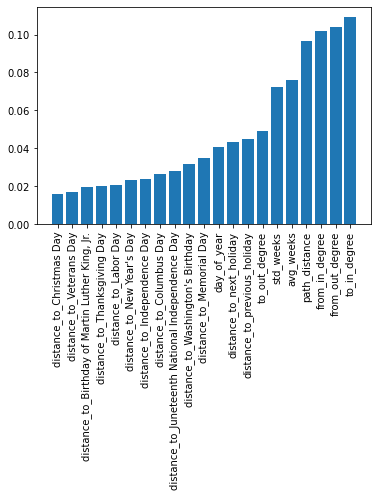

In [2]:
# test
import pandas as pd
from nnights.experiment import Experiment


data_train = pd.read_csv('data/flights_train.csv')
# init exp
exp = Experiment(name='RF_node_deg', data=data_train)

config = {
    'enrich': [
        'add_day_of_year', 
        'add_distance_to_holidays',
        'add_distance_to_next_holiday',
        'add_distance_to_previous_holiday',
        'add_path_distance', 
        'add_path_embedding', 
    ],
    'model': {
        'model_params': {'objective': 'reg:squarederror'},
        'train_params': {'use_cv': True}
    },
    'x_columns': ['avg_weeks', 'std_weeks']
}

# run exp
exp.run(config)
# or if enriched run instead exp.run(config,use_cache=True)


# store exp data
X_data = pd.read_csv("data/flights_Xtest.csv")

In [3]:
# exp.freeze(
#     path="submissions", 
#     X_data=X_data,
#     with_sub=True
# )